In [1]:
import time

In [2]:
time.gmtime(0)

time.struct_time(tm_year=1970, tm_mon=1, tm_mday=1, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=3, tm_yday=1, tm_isdst=0)

In [3]:
time.localtime()

time.struct_time(tm_year=2018, tm_mon=8, tm_mday=6, tm_hour=18, tm_min=34, tm_sec=50, tm_wday=0, tm_yday=218, tm_isdst=0)

In [6]:
time.strftime("%A, %d %b %Y %H:%M:%S +0000", time.gmtime())

'Monday, 06 Aug 2018 15:37:58 +0000'

In [45]:
from matplotlib import pyplot as plt


def timed(f, *args, n_iter=100):
    acc = float("inf")
    for i in range(n_iter):
        t0 = time.perf_counter()
        f(*args)
        acc = min(acc, time.perf_counter() - t0)

    return acc


def compare(fs, args):
    xs = list(range(len(args)))
    for f in fs:
        plt.plot(xs, [timed(f, chunk) for chunk in args],
                 label=f.__name__)
    plt.legend()
    plt.grid(True)
    plt.show()

In [17]:
def fib1(n):
    assert n>=0
    return n if n<=1 else fib1(n-1)+fib1(n-2)

In [18]:
fib1(8)

21

In [28]:
cache={}

def fib2(n):
    assert n>=0
    if n not in cache:
        cache[n]=n if n<=1 else fib2(n-1)+fib2(n-2)
    return cache[n]

In [29]:
fib2(80)

23416728348467685

In [30]:
old_fib=fib1

In [32]:
def memo(f): #декоратор
    cache={}

def memo(f):
    cache={}
    def inner(n):
        if n not in cache:
            cache[n]=f(n)
        return cache[n]
    return inner
        

In [33]:
fib1=memo(old_fib)

In [34]:
fib1(80)

23416728348467685

In [35]:
from functools import lru_cache

In [36]:
fib1=lru_cache(maxsize=None)(old_fib)
fib1(80)

23416728348467685

In [37]:
def fib3(n):
    assert n>=0
    f0,f1=0,1
    for i in range(n-1):
        f0, f1=f1, f0+f1
    return f1

In [38]:
fib3(8)

21

In [39]:
fib3(120)

5358359254990966640871840

In [42]:
timed(fib3, 8000)

0.0015674723629857112

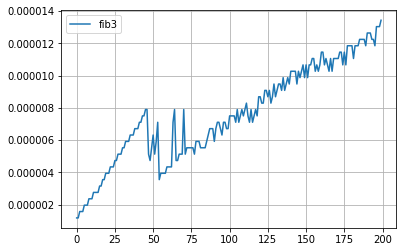

In [48]:
compare([fib3], list(range(200)))